In [ ]:
# This notebook exemplifies an alternative way to sample
# from the Stiefel manifold, see code in StiefelManifoldSampler.py
# In this present notebook, we display selected marginal distributions,
# always from _pairs_ of result matrix entries.


In [1]:
import numpy as np
from numpy.random import default_rng
rng = default_rng()

from StiefelManifoldSampler import StiefelManifoldSampler 

In [3]:
d=4
smf1 = StiefelManifoldSampler(d, d)

N = 1000
print("N:", N)
print("d:", d)

res = np.zeros((N, d, d))
for cyc in range(N):
    res[cyc,:,:] = smf1.sample()


N: 1000
d: 4


In [5]:
#from mpl_toolkits import mplot3d
#from mpl_toolkits.mplot3d import Axes3D
#from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt

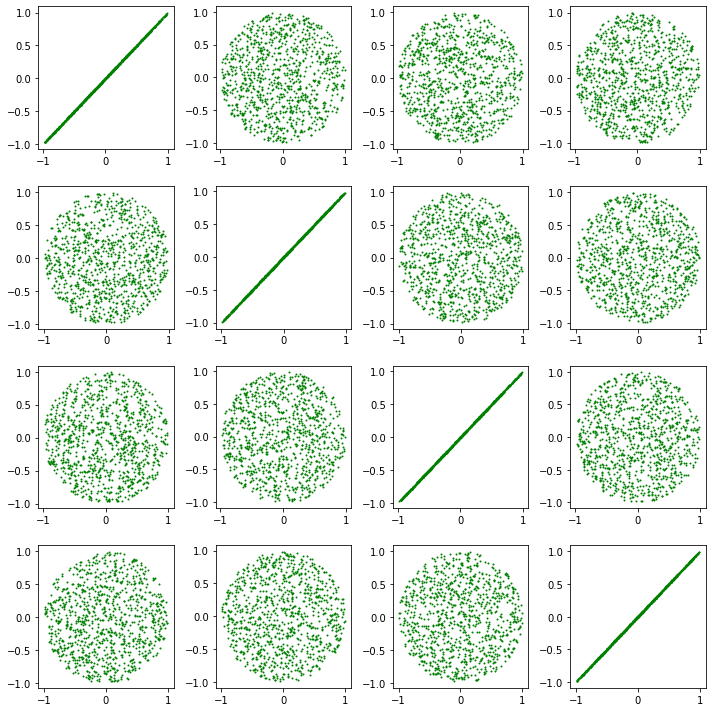

In [28]:
fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot(projection="3d")
axs = fig.subplots(d, d)

for i1 in range(d):
    for i2 in range(d):
        # All-components-pairs of last column of the samples:
        axs[i1,i2].scatter(res[:,i1,d-1], res[:,i2,d-1], color = "green", s=1)

#fig.suptitle('All-components-pairs of d-th column of realizations\n', fontsize=10)

#ax.set_xlabel('x_0')
#ax.set_ylabel('x_1')

# show plot
plt.tight_layout(h_pad=2.0)
plt.show()

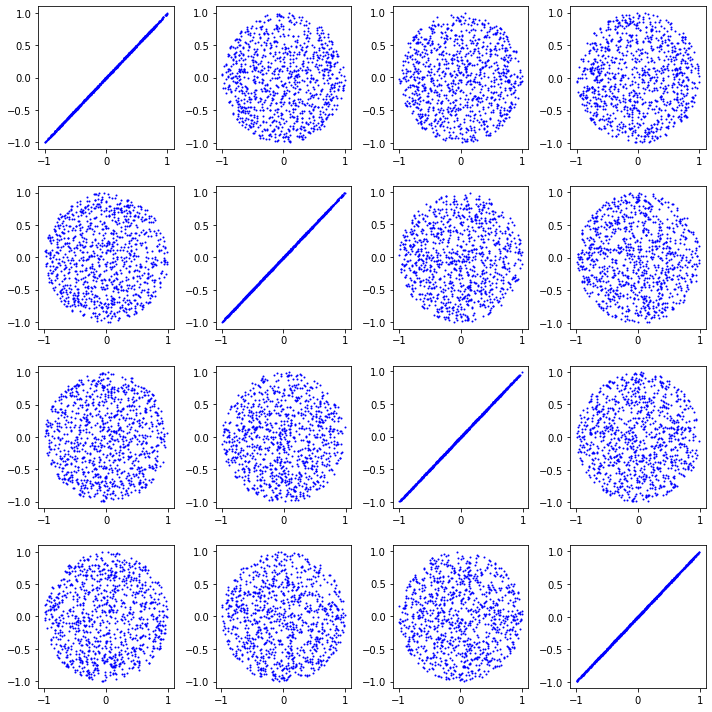

In [29]:
fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot(projection="3d")
axs = fig.subplots(d, d)

for i1 in range(d):
    for i2 in range(d):
        # All-components-pairs of last row of the samples:
        axs[i1,i2].scatter(res[:,d-1,i1], res[:,d-1,i2], color = "blue", s=1)

#fig.suptitle('All-components-pairs of d-th row of realizations\n', fontsize=10)

#ax.set_xlabel('x_0')
#ax.set_ylabel('x_1')

# show plot
plt.tight_layout(h_pad=2.0)
plt.show()

In [34]:
import numpy.random as rnd


At tile (0,0) plot component pair '(1,1) vs (3,3)''
At tile (0,1) plot component pair '(1,1) vs (3,2)''
At tile (0,2) plot component pair '(1,1) vs (1,0)''
At tile (0,3) plot component pair '(1,1) vs (3,0)''
At tile (1,0) plot component pair '(2,1) vs (1,0)''
At tile (1,1) plot component pair '(2,1) vs (0,3)''
At tile (1,2) plot component pair '(2,1) vs (3,3)''
At tile (1,3) plot component pair '(2,1) vs (3,3)''
At tile (2,0) plot component pair '(1,2) vs (0,0)''
At tile (2,1) plot component pair '(1,2) vs (2,1)''
At tile (2,2) plot component pair '(1,2) vs (3,3)''
At tile (2,3) plot component pair '(1,2) vs (1,3)''
At tile (3,0) plot component pair '(3,1) vs (0,0)''
At tile (3,1) plot component pair '(3,1) vs (3,2)''
At tile (3,2) plot component pair '(3,1) vs (1,3)''
At tile (3,3) plot component pair '(3,1) vs (1,2)''


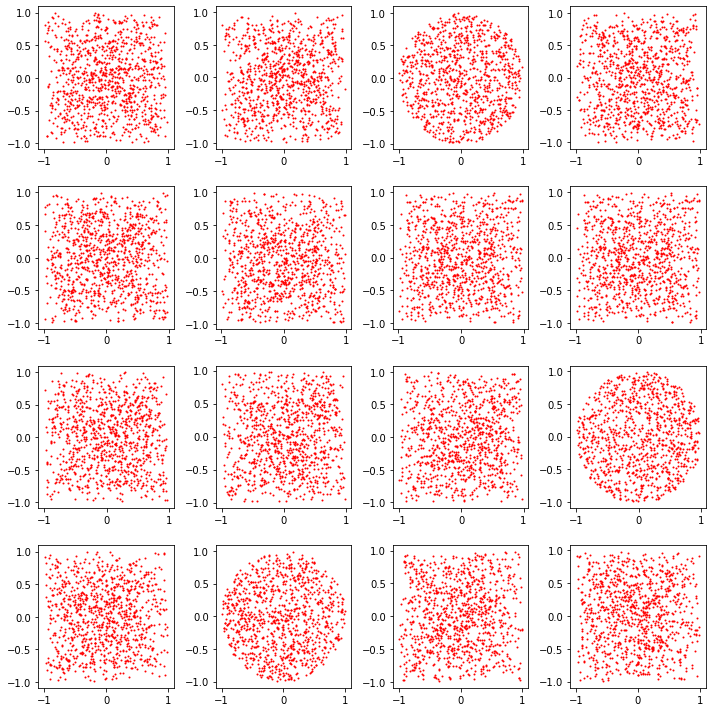

In [37]:
fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot(projection="3d")
axs = fig.subplots(d, d)

for i1 in range(d):
    r1 = rnd.randint(d)
    c1 = rnd.randint(d)
    for i2 in range(d):
        r2 = rnd.randint(d)
        c2 = (rnd.randint(d-1)+1+c1) % d   # uniformly from {0,..,d-1}, but not equal to c1
        print("At tile ({},{}) plot component pair ({},{}) vs ({},{})".format(i1,i2,r1,c1,r2,c2))
        axs[i1,i2].scatter(res[:,r1,c1], res[:,r2,c2], color = "red", s=1)

#fig.suptitle('Random non-diagonal pairs of components of the realizations\n', fontsize=10)

#ax.set_xlabel('x_0')
#ax.set_ylabel('x_1')

# show plot
plt.tight_layout(h_pad=2.0)
plt.show()

# Whenever the components compared are from the same row of
# a realization, the sum of their squares is constrained below
# one, thus display as a disc.